In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Train.csv')

### Missing Values in Item_Weight and Outlet_Size


In [4]:
df_group = df.groupby(['Item_Type','Item_Fat_Content'],as_index=True).mean()['Item_Weight']
df_group=df_group.add_suffix('').reset_index()
df_group

,Item_Type,Item_Fat_Content,Item_Weight
0,Baking Goods,LF,12.052500
1,Baking Goods,Low Fat,12.633128
2,Baking Goods,Regular,11.976126
3,Baking Goods,low fat,10.060000
4,Baking Goods,reg,12.825000
...,...,...,...
65,Starchy Foods,LF,14.375000
66,Starchy Foods,Low Fat,13.669692
67,Starchy Foods,Regular,13.757200
68,Starchy Foods,low fat,14.150000


In [5]:
L=df[df['Item_Weight'].isnull()].index

fat_type=df['Item_Fat_Content'].unique()
item_type=df['Item_Type'].unique()

for ind in L:
    for x in item_type:
        for y in fat_type:
            val=list(df_group[(df_group['Item_Fat_Content']==y) & (df_group['Item_Type']==x)]['Item_Weight'])
            if len(val)>0:
#                 df.loc[ind,'Item_Weight'] = np.where((df['Item_Fat_Content']==y) & (df['Item_Type'] == x), val[0], df['Item_Weight'])
                df.loc[ind,'Item_Weight'] = val

In [6]:
df['Outlet_Size'].fillna(method='ffill',inplace=True)

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.700343,0.066132,140.992782,1997.831867,2181.288914
std,4.240229,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,11.941250,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df=df[df['Item_Visibility']>0]
df=df.reset_index()

In [10]:
df

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,6,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
4,7,FDP10,11.94125,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,8518,FDF22,6.86500,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
7993,8519,FDS36,8.38000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
7994,8520,NCJ29,10.60000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
7995,8521,FDN46,7.21000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
data=df.copy()

### Removing Outliers

In [13]:
from scipy import stats

In [53]:
df=df[(np.abs(stats.zscore(df['Item_Outlet_Sales']))<3)]
df=df[(np.abs(stats.zscore(df['Item_Weight']))<3)]
df=df[(np.abs(stats.zscore(df['Item_Visibility']))<3)]
df=df[(np.abs(stats.zscore(df['Item_MRP']))<3)]

In [15]:
df=df.reset_index()
df

,level_0,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,6,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
4,4,7,FDP10,11.94125,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,7992,8518,FDF22,6.86500,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
7812,7993,8519,FDS36,8.38000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
7813,7994,8520,NCJ29,10.60000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
7814,7995,8521,FDN46,7.21000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [18]:
df.drop(['level_0','index'],axis=1,inplace=True)

In [19]:
data=df.copy()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7816 entries, 0 to 7815
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7816 non-null   object 
 1   Item_Weight                7816 non-null   float64
 2   Item_Fat_Content           7816 non-null   object 
 3   Item_Visibility            7816 non-null   float64
 4   Item_Type                  7816 non-null   object 
 5   Item_MRP                   7816 non-null   float64
 6   Outlet_Identifier          7816 non-null   object 
 7   Outlet_Establishment_Year  7816 non-null   object 
 8   Outlet_Size                7816 non-null   object 
 9   Outlet_Location_Type       7816 non-null   object 
 10  Outlet_Type                7816 non-null   object 
 11  Item_Outlet_Sales          7816 non-null   float64
dtypes: float64(4), object(8)
memory usage: 732.9+ KB


In [92]:
df['Outlet_Establishment_Year']=df['Outlet_Establishment_Year'].astype(str)

In [93]:
df.reset_index(inplace=True)

In [94]:
df

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
4,4,FDP10,11.94125,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,7811,FDF22,6.86500,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
7812,7812,FDS36,8.38000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
7813,7813,NCJ29,10.60000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
7814,7814,FDN46,7.21000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [61]:
df.describe()

,index,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7710.000000,7710.000000,7710.000000,7710.000000,7710.000000
mean,3909.059144,12.740060,0.067611,139.537799,2097.655922
std,2255.918675,4.277991,0.044975,61.569038,1514.654696
min,0.000000,4.555000,0.003575,31.290000,33.290000
25%,1958.250000,9.300000,0.031118,93.244250,856.884600
50%,3910.500000,11.941250,0.056647,141.600900,1789.670400
75%,5859.750000,16.200000,0.096329,183.912100,3032.386100
max,7815.000000,21.350000,0.201688,266.888400,6636.694400


In [62]:
df

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
4,4,FDP10,11.94125,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,7811,FDF22,6.86500,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
7706,7812,FDS36,8.38000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
7707,7813,NCJ29,10.60000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
7708,7814,FDN46,7.21000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

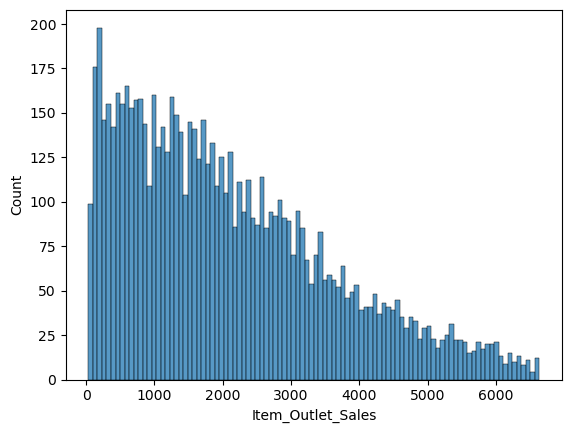

In [60]:
sns.histplot(df['Item_Outlet_Sales'],bins=100)

In [95]:
df.drop(['index'],axis=1,inplace=True)

In [96]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
4,FDP10,11.94125,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
...,...,...,...,...,...,...,...,...,...,...,...,...
7811,FDF22,6.86500,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
7812,FDS36,8.38000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
7813,NCJ29,10.60000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
7814,FDN46,7.21000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:>

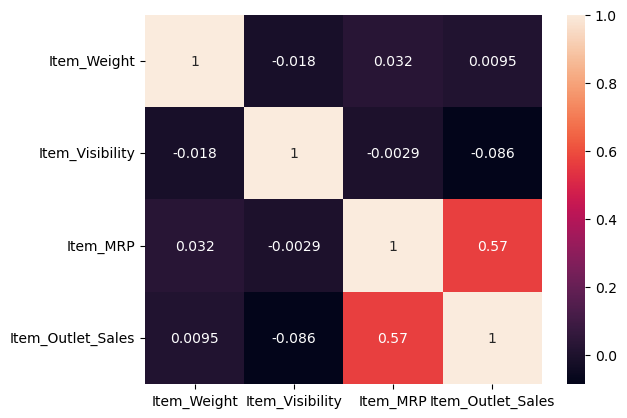

In [66]:
sns.heatmap(df.corr(),annot=True)

In [98]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
4,FDP10,11.94125,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
...,...,...,...,...,...,...,...,...,...,...,...,...
7811,FDF22,6.86500,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
7812,FDS36,8.38000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
7813,NCJ29,10.60000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
7814,FDN46,7.21000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [97]:
data=df.copy()

In [68]:
from scipy.stats import skew

Item_Weight
0.18402070150733685


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


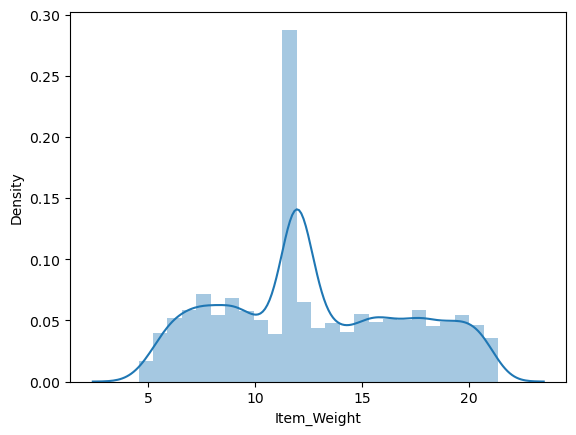

Item_Visibility
0.784596967526589


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


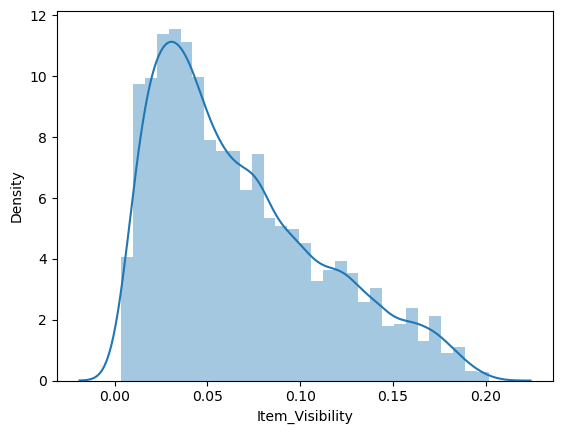

Item_MRP
0.14491839599062095


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


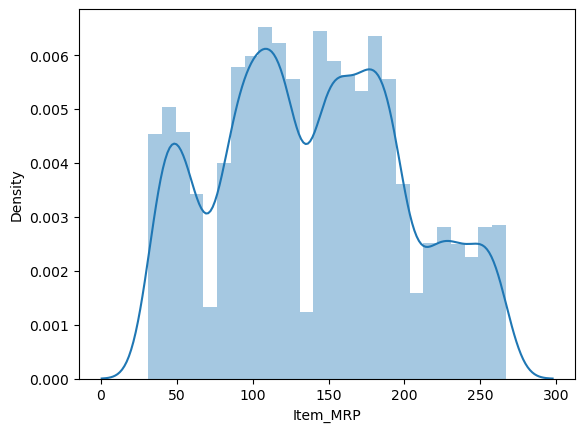

Item_Outlet_Sales
0.7843307983940777


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


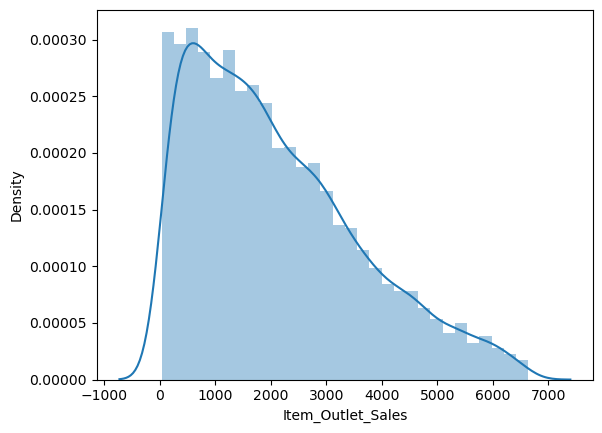

In [69]:
for col in df.select_dtypes(['int64','float64']).columns:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [99]:
df['SalesLog']=np.log(df['Item_Outlet_Sales'])
df['SalesReciprocal']=1/(df['Item_Outlet_Sales'])
df['SalesSqrt']=np.sqrt(df['Item_Outlet_Sales'])
df['Sales_Boxcox'],parameters=stats.boxcox(df['Item_Outlet_Sales'])

Item_Outlet_Sales
Skewness:  0.8718004597332629


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


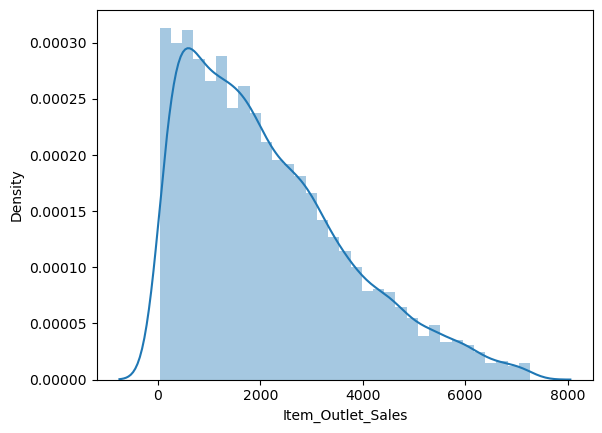

SalesLog
Skewness:  -0.9351455481636993


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


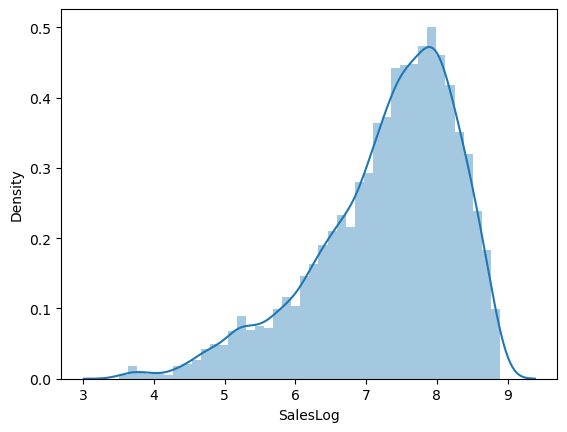

SalesReciprocal
Skewness:  5.763085408775229


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


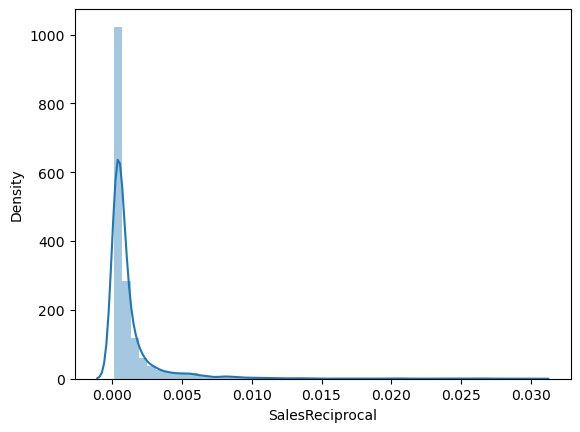

SalesSqrt
Skewness:  0.10890070569055423


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


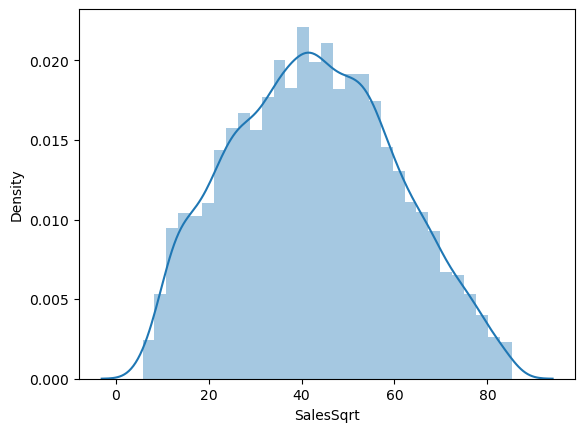

Sales_Boxcox
Skewness:  -0.0957849320951092


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


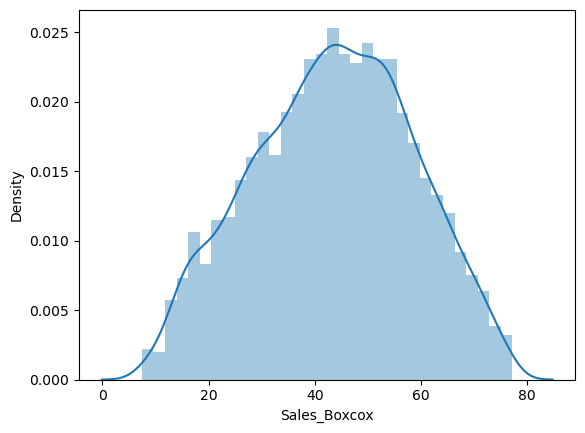

In [100]:
for col in ['Item_Outlet_Sales','SalesLog','SalesReciprocal','SalesSqrt','Sales_Boxcox']:
    print(col)
    print('Skewness: ',skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show()

#### BoxCox method is selected on Item_Outlet_Sales

In [101]:
df['VisLog']=np.log(df['Item_Visibility'])
df['VisReciprocal']=1/(df['Item_Visibility'])
df['VisSqrt']=np.sqrt(df['Item_Visibility'])
df['Vis_Boxcox'],parameters=stats.boxcox(df['Item_Visibility'])

Item_Visibility
Skewness:  0.8368117852606101


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


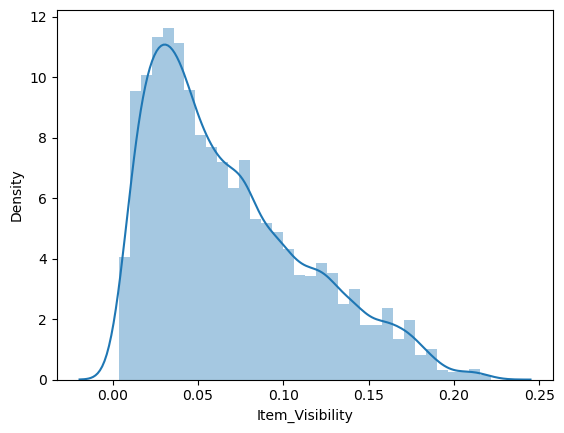

VisLog
Skewness:  -0.48729669891369326


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


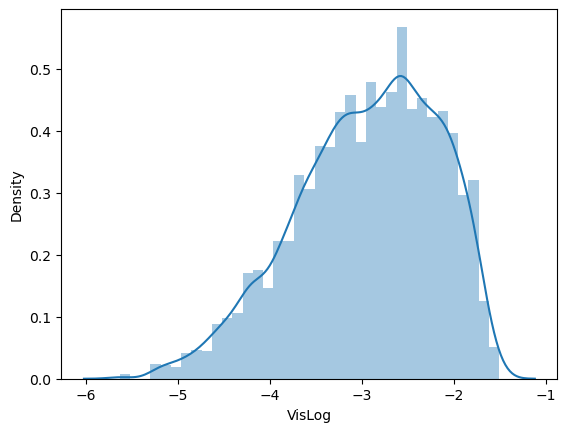

C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


VisReciprocal
Skewness:  3.050327572734456


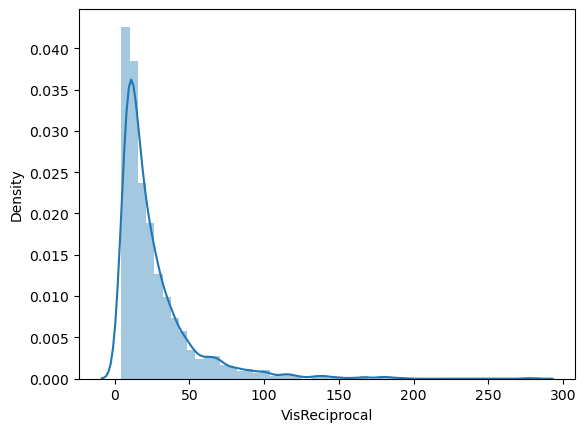

VisSqrt
Skewness:  0.24694203607210197


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


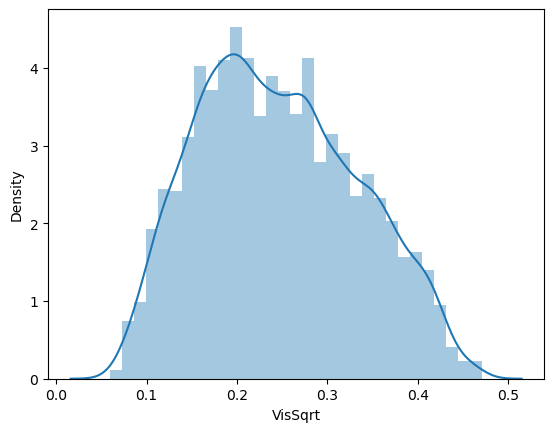

Vis_Boxcox
Skewness:  -0.05430363885642747


C:\Users\Shubh Pundir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


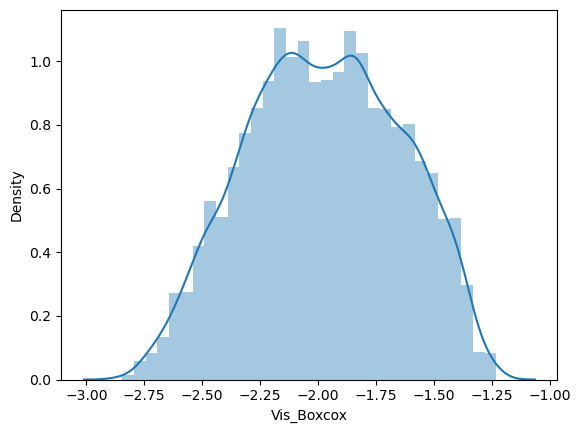

In [102]:
for col in ['Item_Visibility','VisLog','VisReciprocal','VisSqrt','Vis_Boxcox']:
    print(col)
    print('Skewness: ',skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show()

#### Square Root method is used for Item_Visibility

In [103]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,SalesLog,SalesReciprocal,SalesSqrt,Sales_Boxcox,VisLog,VisReciprocal,VisSqrt,Vis_Boxcox
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,8.225540,0.000268,61.115775,59.192949,-4.132215,62.315775,0.126678,-2.455511
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,6.094524,0.002255,21.057607,24.582341,-3.948780,51.872020,0.138846,-2.395919
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,7.648392,0.000477,45.795961,46.870049,-4.088756,59.665604,0.129461,-2.441666
3,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,5.839341,0.002911,18.535177,22.036668,-4.362923,78.486227,0.112876,-2.526268
4,FDP10,11.94125,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,8.299724,0.000249,63.425260,60.985079,-2.059875,7.844992,0.357029,-1.567803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,FDF22,6.86500,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,7.929625,0.000360,52.710373,52.533003,-2.868511,17.610784,0.238293,-1.975975
7812,FDS36,8.38000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850,6.308617,0.001821,23.436830,26.919984,-3.057982,21.284553,0.216754,-2.059045
7813,NCJ29,10.60000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,7.084322,0.000838,34.541477,37.204934,-3.347099,28.420176,0.187580,-2.177657
7814,FDN46,7.21000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.520558,0.000542,42.960419,44.492021,-1.929501,6.886073,0.381078,-1.492963


In [104]:
df.drop(['Item_Visibility','VisLog','VisReciprocal','Vis_Boxcox'],axis=1,inplace=True)
df.drop(['SalesLog','SalesReciprocal','SalesSqrt'],axis=1,inplace=True)

In [105]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Sales_Boxcox,VisSqrt
0,FDA15,9.30000,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,59.192949,0.126678
1,DRC01,5.92000,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,24.582341,0.138846
2,FDN15,17.50000,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,46.870049,0.129461
3,FDO10,13.65000,Regular,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,22.036668,0.112876
4,FDP10,11.94125,Low Fat,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,60.985079,0.357029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7811,FDF22,6.86500,Low Fat,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,52.533003,0.238293
7812,FDS36,8.38000,Regular,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850,26.919984,0.216754
7813,NCJ29,10.60000,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,37.204934,0.187580
7814,FDN46,7.21000,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,44.492021,0.381078


In [106]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Sales_Boxcox', 'VisSqrt'],
      dtype='object')

In [107]:
data=df.copy()

<AxesSubplot:>

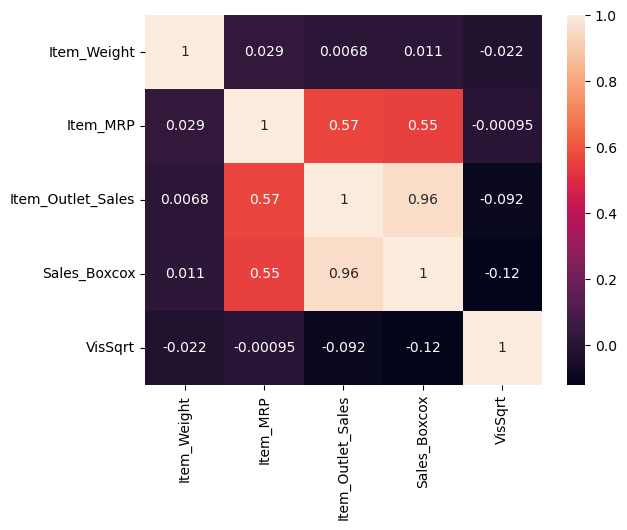

In [108]:
sns.heatmap(df.corr(),annot=True)

In [110]:
data.to_csv('Data.csv')

### ML Algorithms

In [ ]:
X=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [111]:
df[['Item_Outlet_Sales','Sales_Boxcox']]

,Item_Outlet_Sales,Sales_Boxcox
0,3735.1380,59.192949
1,443.4228,24.582341
2,2097.2700,46.870049
3,343.5528,22.036668
4,4022.7636,60.985079
...,...,...
7811,2778.3834,52.533003
7812,549.2850,26.919984
7813,1193.1136,37.204934
7814,1845.5976,44.492021


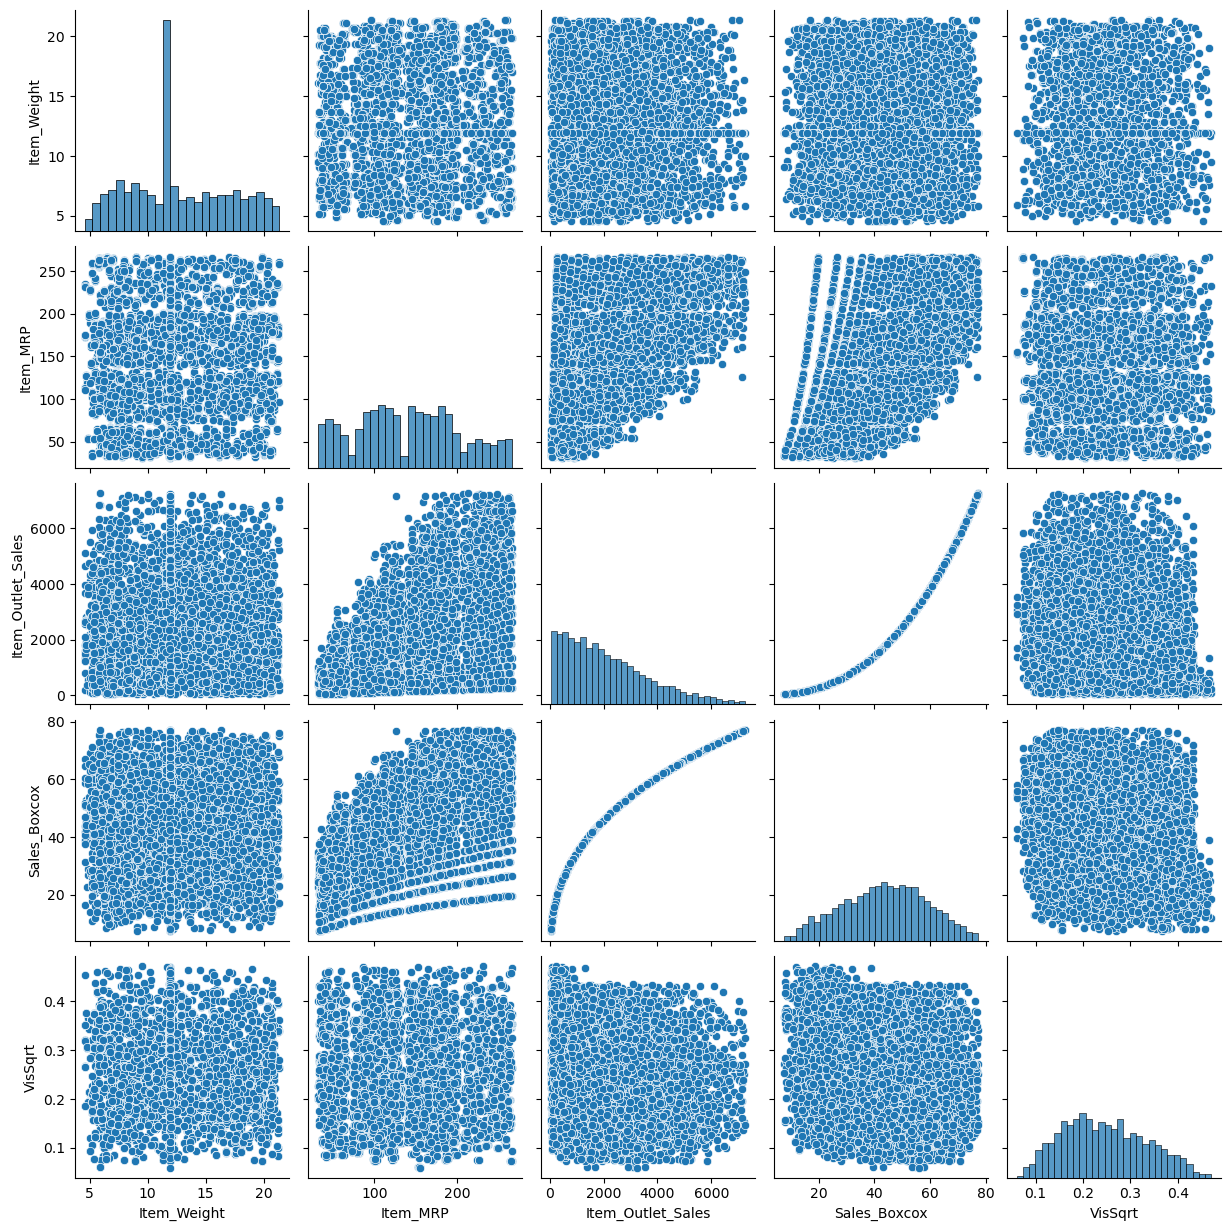

In [112]:
sns.pairplot(df)